In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_22360\3313838806.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('bollywood_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1615 non-null   int64  
 1   movie_id      1615 non-null   object 
 2   Title         1615 non-null   object 
 3   year          1615 non-null   int64  
 4   genre         1615 non-null   object 
 5   overview      1615 non-null   object 
 6   director      1615 non-null   object 
 7   cast          1615 non-null   object 
 8   rating        1555 non-null   float64
 9   votes         1555 non-null   float64
 10  Runtime       1539 non-null   object 
 11  Release Date  1580 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 151.5+ KB


In [4]:
columns_to_drop = ['Unnamed: 0']
df = df.drop(columns = columns_to_drop)

In [5]:
df.head()

,movie_id,Title,year,genre,overview,director,cast,rating,votes,Runtime,Release Date
0,tt15354916,Jawan,2023,"Action, Thriller",A high-octane action thriller which outlines t...,Atlee,"Shah Rukh Khan, Nayanthara, Vijay Sethupathi, ...",6.9,101730.0,['169'],2023.0
1,tt15748830,Jaane Jaan,2023,"Crime, Drama, Mystery",A single mother and her daughter who commit a ...,Sujoy Ghosh,"Kareena Kapoor, Jaideep Ahlawat, Vijay Varma, ...",7.0,15198.0,['139'],2023.0
2,tt11663228,Jailer,2023,"Action, Comedy, Crime",A retired jailer goes on a manhunt to find his...,Nelson Dilipkumar,"Rajinikanth, Mohanlal, Shivarajkumar, Jackie S...",7.1,38513.0,['168'],2023.0
3,tt14993250,Rocky Aur Rani Kii Prem Kahaani,2023,"Comedy, Drama, Family",Flamboyant Punjabi Rocky and intellectual Beng...,Karan Johar,"Ranveer Singh, Alia Bhatt, Dharmendra, Shabana...",6.5,43489.0,['168'],2023.0
4,tt15732324,OMG 2,2023,"Comedy, Drama",An unhappy civilian asks the court to mandate ...,Amit Rai,"Pankaj Tripathi, Akshay Kumar, Yami Gautam, Pa...",7.5,44037.0,['156'],2023.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      1615 non-null   object 
 1   Title         1615 non-null   object 
 2   year          1615 non-null   int64  
 3   genre         1615 non-null   object 
 4   overview      1615 non-null   object 
 5   director      1615 non-null   object 
 6   cast          1615 non-null   object 
 7   rating        1555 non-null   float64
 8   votes         1555 non-null   float64
 9   Runtime       1539 non-null   object 
 10  Release Date  1580 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 138.9+ KB


In [7]:
missing_values = df.isnull().sum()
print(missing_values)


movie_id         0
Title            0
year             0
genre            0
overview         0
director         0
cast             0
rating          60
votes           60
Runtime         76
Release Date    35
dtype: int64


In [8]:
df = df.dropna()

In [9]:
split_cast = df['cast'].str.split(',').apply(lambda x: [actor.strip() for actor in x])

df['main_lead'] = split_cast.apply(lambda x: x[0] if len(x) > 0 else None)
df['lead2'] = split_cast.apply(lambda x: x[1] if len(x) > 1 else None)



In [10]:
df.describe()

,year,rating,votes,Release Date
count,1526.000000,1526.000000,1526.000000,1526.000000
mean,2014.448231,6.041809,14444.960026,2014.454784
std,6.858352,1.443114,34104.946370,6.867475
min,2000.000000,1.200000,7.000000,2000.000000
25%,2009.000000,5.100000,1837.250000,2009.000000
50%,2016.000000,6.200000,5306.500000,2016.000000
75%,2020.000000,7.200000,15150.750000,2020.000000
max,2024.000000,9.600000,676837.000000,2024.000000


## Success Column Creation

In [11]:
# Function to determine the success based on Rating and Votes
def get_success(row):
    if row['rating'] < 6:
        return 'Flop'
    elif 6 <= row['rating'] < 7 and row['votes'] >= 1800: # Thresholds based on quantiles
        return 'Average'
    elif row['rating'] > 7 and row['votes'] >= 5000:
        return 'Hit'
    elif row['rating'] > 7 and row['votes'] < 5000:
        return 'Average'
    else:
        return 'Flop'

df['Success'] = df.apply(get_success, axis=1)




In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1526 entries, 0 to 1614
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      1526 non-null   object 
 1   Title         1526 non-null   object 
 2   year          1526 non-null   int64  
 3   genre         1526 non-null   object 
 4   overview      1526 non-null   object 
 5   director      1526 non-null   object 
 6   cast          1526 non-null   object 
 7   rating        1526 non-null   float64
 8   votes         1526 non-null   float64
 9   Runtime       1526 non-null   object 
 10  Release Date  1526 non-null   float64
 11  main_lead     1526 non-null   object 
 12  lead2         1524 non-null   object 
 13  Success       1526 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 178.8+ KB


## Handling Runtime Column

In [13]:
import ast

df['Runtime'] = df['Runtime'].apply(lambda x: ast.literal_eval(x)[0] if isinstance(x, str) else x[0])

df['Runtime'] = df['Runtime'].astype(int)

print(df['Runtime'])


0       169
1       139
2       168
3       168
4       156
       ... 
1610    131
1611    128
1612    136
1613    113
1614    131
Name: Runtime, Length: 1526, dtype: int32


In [14]:
df.describe()

,year,rating,votes,Runtime,Release Date
count,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000
mean,2014.448231,6.041809,14444.960026,134.397117,2014.454784
std,6.858352,1.443114,34104.946370,23.535245,6.867475
min,2000.000000,1.200000,7.000000,46.000000,2000.000000
25%,2009.000000,5.100000,1837.250000,119.000000,2009.000000
50%,2016.000000,6.200000,5306.500000,135.000000,2016.000000
75%,2020.000000,7.200000,15150.750000,150.000000,2020.000000
max,2024.000000,9.600000,676837.000000,321.000000,2024.000000


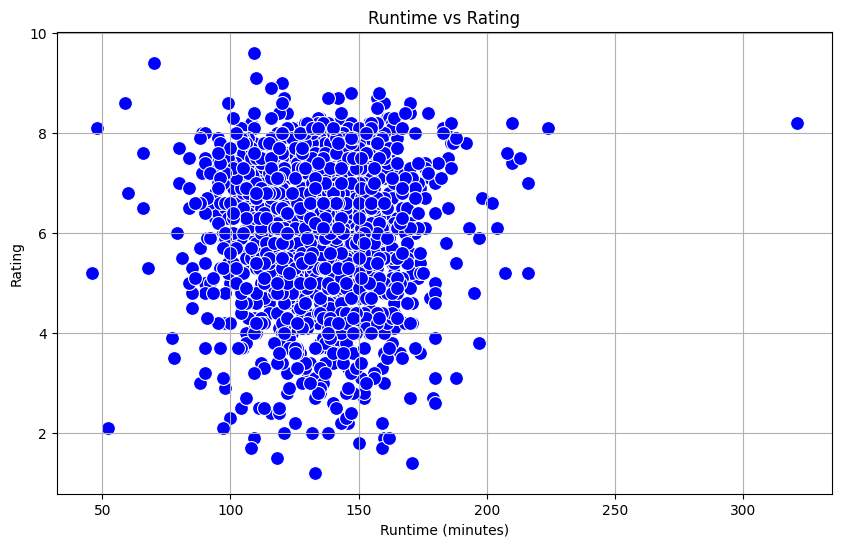

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Runtime', y='rating', color='blue', s=100)
plt.title('Runtime vs Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


In [16]:
df = df[df['Runtime'] >= 80]

In [17]:
df = df[df['Runtime'] < 250]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1513 entries, 0 to 1614
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      1513 non-null   object 
 1   Title         1513 non-null   object 
 2   year          1513 non-null   int64  
 3   genre         1513 non-null   object 
 4   overview      1513 non-null   object 
 5   director      1513 non-null   object 
 6   cast          1513 non-null   object 
 7   rating        1513 non-null   float64
 8   votes         1513 non-null   float64
 9   Runtime       1513 non-null   int32  
 10  Release Date  1513 non-null   float64
 11  main_lead     1513 non-null   object 
 12  lead2         1512 non-null   object 
 13  Success       1513 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(9)
memory usage: 171.4+ KB


In [19]:
df.head()

,movie_id,Title,year,genre,overview,director,cast,rating,votes,Runtime,Release Date,main_lead,lead2,Success
0,tt15354916,Jawan,2023,"Action, Thriller",A high-octane action thriller which outlines t...,Atlee,"Shah Rukh Khan, Nayanthara, Vijay Sethupathi, ...",6.9,101730.0,169,2023.0,Shah Rukh Khan,Nayanthara,Average
1,tt15748830,Jaane Jaan,2023,"Crime, Drama, Mystery",A single mother and her daughter who commit a ...,Sujoy Ghosh,"Kareena Kapoor, Jaideep Ahlawat, Vijay Varma, ...",7.0,15198.0,139,2023.0,Kareena Kapoor,Jaideep Ahlawat,Flop
2,tt11663228,Jailer,2023,"Action, Comedy, Crime",A retired jailer goes on a manhunt to find his...,Nelson Dilipkumar,"Rajinikanth, Mohanlal, Shivarajkumar, Jackie S...",7.1,38513.0,168,2023.0,Rajinikanth,Mohanlal,Hit
3,tt14993250,Rocky Aur Rani Kii Prem Kahaani,2023,"Comedy, Drama, Family",Flamboyant Punjabi Rocky and intellectual Beng...,Karan Johar,"Ranveer Singh, Alia Bhatt, Dharmendra, Shabana...",6.5,43489.0,168,2023.0,Ranveer Singh,Alia Bhatt,Average
4,tt15732324,OMG 2,2023,"Comedy, Drama",An unhappy civilian asks the court to mandate ...,Amit Rai,"Pankaj Tripathi, Akshay Kumar, Yami Gautam, Pa...",7.5,44037.0,156,2023.0,Pankaj Tripathi,Akshay Kumar,Hit


## One hot Encoding of Genre

In [20]:

df['Genre_list'] = df['genre'].apply(lambda x: [genre.strip() for genre in x.split(', ')])

all_genres = set(genre for genres in df['Genre_list'] for genre in genres)

for genre in all_genres:
    df[genre] = df['Genre_list'].apply(lambda x: 1 if genre in x else 0)

df = df.drop(columns=['Genre_list'])


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1513 entries, 0 to 1614
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      1513 non-null   object 
 1   Title         1513 non-null   object 
 2   year          1513 non-null   int64  
 3   genre         1513 non-null   object 
 4   overview      1513 non-null   object 
 5   director      1513 non-null   object 
 6   cast          1513 non-null   object 
 7   rating        1513 non-null   float64
 8   votes         1513 non-null   float64
 9   Runtime       1513 non-null   int32  
 10  Release Date  1513 non-null   float64
 11  main_lead     1513 non-null   object 
 12  lead2         1512 non-null   object 
 13  Success       1513 non-null   object 
 14                1513 non-null   int64  
 15  Thriller      1513 non-null   int64  
 16  Adventure     1513 non-null   int64  
 17  Romance       1513 non-null   int64  
 18  Sci-Fi        1513 non-null   int

In [22]:
df.drop(df.columns[14], axis=1, inplace=True)

## Handling Cast Column

In [23]:
split_cast = df['cast'].str.split(',').apply(lambda x: [actor.strip() for actor in x])

df['main_lead'] = split_cast.apply(lambda x: x[0] if len(x) > 0 else None)
df['lead2'] = split_cast.apply(lambda x: x[1] if len(x) > 1 else None)


In [24]:
# Calculate hit counts and total counts for Director, main_lead, and lead2
def calculate_success_rate(group, column_name):
    total_movies = len(group)
    hit_count = len(group[group['Success'] == 'Hit'])
    return hit_count / total_movies if total_movies > 0 else 0

# Calculate director_success
director_success = (
    df.groupby('director')
    .apply(lambda group: calculate_success_rate(group, 'director'))
    .rename('director_success')
)
df = df.merge(director_success, on='director', how='left')

# Calculate lead_success (main_lead)
lead_success = (
    df.groupby('main_lead')
    .apply(lambda group: calculate_success_rate(group, 'main_lead'))
    .rename('lead_success')
)
df = df.merge(lead_success, on='main_lead', how='left')

# Calculate lead2_success (lead2)
lead2_success = (
    df.groupby('lead2')
    .apply(lambda group: calculate_success_rate(group, 'lead2'))
    .rename('lead2_success')
)
df = df.merge(lead2_success, on='lead2', how='left')



C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_22360\1034839787.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: calculate_success_rate(group, 'director'))
C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_22360\1034839787.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: calculate_success_rate(group, 'main_lead'))
C:\Users\G Vijayalakshmi\AppData\

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          1513 non-null   object 
 1   Title             1513 non-null   object 
 2   year              1513 non-null   int64  
 3   genre             1513 non-null   object 
 4   overview          1513 non-null   object 
 5   director          1513 non-null   object 
 6   cast              1513 non-null   object 
 7   rating            1513 non-null   float64
 8   votes             1513 non-null   float64
 9   Runtime           1513 non-null   int32  
 10  Release Date      1513 non-null   float64
 11  main_lead         1513 non-null   object 
 12  lead2             1512 non-null   object 
 13  Success           1513 non-null   object 
 14  Thriller          1513 non-null   int64  
 15  Adventure         1513 non-null   int64  
 16  Romance           1513 non-null   int64  


In [26]:
columns_to_drop = ['Title','movie_id','overview','director','Release Date','genre','cast','rating','main_lead','lead2']
df = df.drop(columns=columns_to_drop)

## Model Training

## Random Forest

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df.drop(columns=['Success'])  # All columns except the target
y = df['Success']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Random Forest Classifier Performance:
Accuracy: 0.7194719471947195

Classification Report:
               precision    recall  f1-score   support

     Average       0.67      0.30      0.41        94
        Flop       0.67      0.89      0.76       144
         Hit       0.90      0.95      0.93        65

    accuracy                           0.72       303
   macro avg       0.74      0.71      0.70       303
weighted avg       0.72      0.72      0.69       303



## Hyper Paramter Tuning For Random Forest Classifier

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Feature selection
X = df.drop(columns=['Success'])  # All columns except the target
y = df['Success']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,  # Number of cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Perform the random search on the training data
random_search.fit(X_train, y_train)

# Display the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Predict on the test set using the best estimator
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Best Cross-Validation Score: 0.7363707834803331
Test Set Accuracy: 0.7062706270627063

Classification Report:
               precision    recall  f1-score   support

     Average       0.59      0.36      0.45        94
        Flop       0.67      0.83      0.74       144
         Hit       0.90      0.94      0.92        65

    accuracy                           0.71       303
   macro avg       0.72      0.71      0.70       303
weighted avg       0.69      0.71      0.69       303



## XG Boost, Catboost and LightGBM

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Feature selection
X = df.drop(columns=['Success'])  
y = df['Success']  

# Encode target labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"{model_name} Performance:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}\n")
    return accuracy

xgb = XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), random_state=42)
xgb.fit(X_train, y_train)
xgb_accuracy = evaluate_model(xgb, X_test, y_test, "XGBoost")


lgbm = LGBMClassifier(objective='multiclass', random_state=42)
lgbm.fit(X_train, y_train)
lgbm_accuracy = evaluate_model(lgbm, X_test, y_test, "LightGBM")


catboost = CatBoostClassifier(verbose=0, random_state=42)
catboost.fit(X_train, y_train)
catboost_accuracy = evaluate_model(catboost, X_test, y_test, "CatBoost")


print("Model Comparison:")
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")
print(f"LightGBM Accuracy: {lgbm_accuracy:.2f}")
print(f"CatBoost Accuracy: {catboost_accuracy:.2f}")


XGBoost Performance:
              precision    recall  f1-score   support

     Average       0.60      0.43      0.50        94
        Flop       0.70      0.81      0.75       144
         Hit       0.87      0.92      0.90        65

    accuracy                           0.72       303
   macro avg       0.72      0.72      0.71       303
weighted avg       0.70      0.72      0.70       303

XGBoost Accuracy: 0.72

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 503
[LightGBM] [Info] Number of data points in the train set: 1210, number of used features: 21
[LightGBM] [Info] Start training from score -1.305362
[LightGBM] [Info] Start training from score -0.646327
[LightGBM] [Info] Start training from score -1.584947
[LightGBM] [Warning] No further splits with positive gain, be